___
# Loading the data and libraries
___

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

while any(marker in os.getcwd() for marker in ['workspace_capstone']):
    os.chdir("..")

sys.path.append('classes_and_functions_capstone')

current_directory = os.getcwd()
current_directory

'c:\\Users\\barto\\Documents\\DAAF\\dataanalystsandfriends\\CapstoneClustering'

In [28]:
# Importing external packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import statsmodels.api as sm
import random
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.formula.api import ols
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Importing custom-made functions and classes
from classes_and_functions_capstone.custom_functions_classes_capstone import (
    DropColumnTransformer,
    LogTransformer,
    corr_matrix_dataframe,
    plot_algo3d,
    plot_algo3d_interactive,
    plot_violin_with_binary_hue,
)

import warnings
warnings.filterwarnings("ignore")

# GLOBAL_SEED = 42

# random.seed(GLOBAL_SEED)
# np.random.seed(GLOBAL_SEED)
# stats.seed = GLOBAL_SEED

In [3]:
raw_data = pd.read_csv(r'attachments_capstone\KIRC_gene_exp.csv')

In [4]:
raw_data.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-B0-5402-01,-0.613869,3.907610,-0.092480,-0.428222,-0.732195,-0.228208,-1.147002,-0.799435,-0.089858,...,-0.169414,0.710281,-0.201891,0.153669,0.068967,-0.449808,0.059252,-0.063909,0.328185,1.578171
1,TCGA-CJ-4634-01,1.150781,0.451041,-0.092480,-0.582534,-0.153104,0.172521,0.046365,-0.227903,0.352889,...,0.088788,-0.638642,0.265801,-0.645776,0.446156,0.172093,0.519404,-0.683210,-0.652565,-0.989972
2,TCGA-B0-4828-01,0.450394,0.096415,-0.061711,0.075810,-0.529892,-0.497759,1.062191,-0.057001,0.865147,...,0.153398,-0.635284,-0.628036,1.913753,1.137948,0.171959,-0.565262,0.371532,-0.924489,-0.475239
3,TCGA-CZ-5452-11,1.397206,0.478936,-0.092480,2.427314,0.385003,-0.140100,0.429928,-0.554670,-0.415514,...,0.013822,1.565750,-0.550874,-0.625024,-0.991979,-0.875701,-0.970794,-0.536241,2.851699,-0.766554
4,TCGA-B4-5835-01,-1.127536,-0.586795,-0.092480,-0.651031,-2.056976,1.756855,-1.152287,-0.954072,-0.415514,...,-0.113072,1.060696,-0.711862,-0.377746,-1.412339,-1.560296,-1.259452,1.117531,-0.983725,0.465267


---
# ***EDA***
---

In [5]:
raw_data.isnull().sum().sum()

0

In [6]:
np.round(raw_data.describe(), 5)

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
count,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,...,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000,606.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000
std,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,...,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083
min,-2.27184,-0.64595,-0.09248,-2.19058,-2.05698,-2.03042,-2.08632,-1.00531,-0.41551,-0.67608,...,-0.16941,-0.76905,-1.59605,-0.64578,-2.79587,-1.68202,-1.35069,-1.57147,-1.21840,-1.56307
25%,-0.70274,-0.45754,-0.09248,-0.67545,-0.56824,-0.47408,-0.68788,-0.59200,-0.41551,-0.40170,...,-0.16941,-0.60279,-0.61259,-0.61706,-0.61410,-0.56900,-0.71992,-0.57379,-0.71238,-0.57134
50%,-0.09519,-0.25978,-0.09248,-0.30540,-0.06842,-0.11954,-0.17666,-0.26307,-0.41551,-0.19635,...,-0.09174,-0.41011,-0.12210,-0.40230,-0.09583,-0.13107,-0.20168,-0.24777,-0.25113,-0.17687
75%,0.56493,0.07353,-0.09248,0.52360,0.42744,0.29131,0.45326,0.27360,0.07958,0.08745,...,0.01727,0.16824,0.41382,0.28774,0.48113,0.38944,0.49776,0.33269,0.44667,0.35797
max,4.28571,13.68242,21.90922,4.72181,9.22647,15.59750,5.42727,9.74453,14.40080,12.12609,...,24.24242,6.14061,12.28388,7.78091,6.84314,12.59812,5.83531,12.67937,4.94331,12.70433


We can see that the data was normalized as $\mu = 0$ and $\sigma = 1$ for all features.

In [7]:
raw_data.dtypes.value_counts()

float64    20530
object         1
Name: count, dtype: int64

In [4]:
numeric_columns = raw_data.iloc[:, 1:].columns

In [5]:
minimal_val = min(raw_data.describe().iloc[3, :])

In [6]:
log_pipeline = make_pipeline(
    LogTransformer(numeric_columns, minimal_val),
)
log_data = log_pipeline.fit_transform(raw_data)

In [11]:
log_data.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-B0-5402-01,1.745665,2.327394,1.832758,1.777552,1.724798,1.810806,1.648001,1.712743,1.833177,...,1.820374,1.953575,1.815100,1.871379,1.858257,1.773896,1.856741,1.837318,1.897885,2.069612
1,TCGA-CJ-4634-01,2.014151,1.916132,1.832758,1.751119,1.823012,1.874276,1.854726,1.810856,1.901581,...,1.861343,1.741332,1.888490,1.740081,1.915412,1.874211,1.926143,1.733490,1.738889,1.677771
2,TCGA-B0-4828-01,1.916036,1.862528,1.837668,1.859323,1.760215,1.765727,2.002260,1.838417,1.975293,...,1.871337,1.741921,1.743190,2.111102,2.012437,1.874190,1.754113,1.904361,1.689928,1.769572
3,TCGA-CZ-5452-11,2.046503,1.920228,1.832758,2.171439,1.906365,1.825111,1.913019,1.755944,1.779698,...,1.849620,2.068043,1.756600,1.743717,1.677396,1.698891,1.681347,1.759123,2.218690,1.718656
4,TCGA-B4-5835-01,1.651740,1.750379,1.832758,1.739158,1.455495,2.091918,1.646983,1.684454,1.779698,...,1.829458,2.002058,1.728415,1.786049,1.595591,1.565128,1.626124,2.009705,1.678937,1.918223


---
# ***Dimensionality Reduction***
---

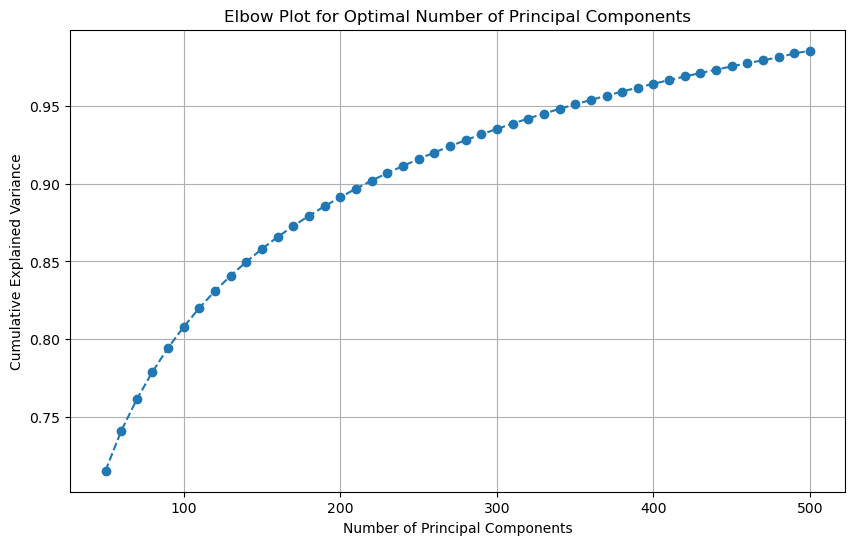

In [12]:
# Assuming log_data is already loaded as a DataFrame
# Standardize the data
# Perform PCA to reduce to 25 components
explained_variance = []
component_range = range(50, 501, 10)  # Testing up to 50 components as an example
for n in component_range:
    pca = PCA(n_components=n)
    pca.fit(log_data.iloc[:, 1:])
    explained_variance.append(sum(pca.explained_variance_ratio_))

# Plot the explained variance (Elbow plot)
plt.figure(figsize=(10, 6))
plt.plot(component_range, explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for Optimal Number of Principal Components')
plt.grid(True)
plt.show()


na oko 140

In [7]:
pca = PCA(n_components=140)
pca.fit(log_data.iloc[:, 1:])

PCA(n_components=140)

In [8]:
pca_data = pca.transform(log_data.iloc[:, 1:])
pca_data = pd.DataFrame(pca_data, columns=[[f'PC {i}' for i in range(1, 141)]])

In [15]:
pca_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 131,PC 132,PC 133,PC 134,PC 135,PC 136,PC 137,PC 138,PC 139,PC 140
0,-3.376540,-3.981812,-1.335473,-3.845171,-0.445175,1.249022,1.978061,2.821699,-0.354303,-1.100877,...,-0.214562,-0.518669,-0.016955,0.504064,0.817309,0.084545,0.754560,-0.104456,-0.192152,0.467813
1,-2.662265,-4.923601,4.162014,-3.821722,-0.951273,-0.560396,1.436651,0.960198,0.803653,1.002361,...,0.030412,0.141638,0.405353,0.366259,0.220558,0.146889,0.251585,0.097695,-0.123860,0.291268
2,8.040977,0.699886,5.043590,-3.731042,-4.700372,1.664743,-0.950009,3.972040,-0.237350,0.822884,...,-0.228912,1.090852,-0.106810,-0.552328,-0.278343,-1.270880,0.311991,-0.619184,1.111534,0.180258
3,-11.630067,9.263061,5.836070,2.543949,2.124906,-1.934900,-4.189081,3.277147,-5.643465,1.688088,...,0.296492,0.189155,-0.039890,0.129201,-0.135541,-0.220967,-0.207038,0.174586,-0.289359,0.202426
4,1.731417,7.189736,-8.085618,4.640217,-6.131393,-2.370612,2.276611,2.366606,6.704459,6.292671,...,1.341878,0.883359,0.148953,0.341424,-0.035849,0.396038,-0.298560,-0.287431,0.494147,-0.349895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,-1.749263,-0.191445,-1.092099,1.285518,10.242400,2.829260,-1.762393,2.259578,-2.222057,-1.549024,...,0.745020,-0.128763,-0.754598,-0.481198,-0.347033,0.320084,-0.767051,1.059530,0.697476,-0.774564
602,2.014981,-5.178162,2.269721,2.980116,4.089849,-0.494542,1.993053,4.325017,1.967151,0.193393,...,-1.158017,-0.168469,-0.277817,0.431958,-0.221831,-0.289980,2.207219,-0.912057,-1.807865,0.807516
603,3.324188,-0.719505,-0.198415,-2.964247,-4.761075,-3.488181,0.279632,2.384724,-2.190355,1.349752,...,-0.356901,0.702920,-1.083101,0.720316,-0.177441,0.614418,-0.138906,-0.262375,-1.244392,0.633352
604,5.048171,-2.781033,-5.482346,11.791465,0.529373,0.259483,-0.664715,6.613307,3.731756,1.701212,...,0.677044,0.411829,0.255612,-0.167077,0.397727,0.099940,-0.357131,-0.339605,-0.264104,-0.037948


In [43]:
Umap = umap.UMAP(n_components=3)

In [44]:
umap_data = Umap.fit_transform(pca_data)

In [29]:
tsne = TSNE(n_components=3)

In [30]:
tsne_data = tsne.fit_transform(pca_data)

In [169]:
tsne_data

array([[-1.91127613e-01, -2.18018293e+00, -8.66681244e-03],
       [-3.44645810e+00, -5.39852428e+00,  6.92202389e-01],
       [ 8.18663216e+00, -6.46758556e+00, -6.56933963e-01],
       ...,
       [ 4.85337687e+00, -3.92629385e+00,  1.18236236e-01],
       [ 8.01472950e+00,  2.00830865e+00, -7.59652662e+00],
       [-1.08745575e+01,  1.30141716e+01,  6.75493860e+00]], dtype=float32)

The highest silhouette score: 0.7278775572776794 (Optimal clusters: 2)
The lowest Davies-Bouldin score: 0.3516997037104876 (Optimal clusters: 2)
The highest Calinski-Harabasz score: 1809.1900051262694 (Optimal clusters: 2)


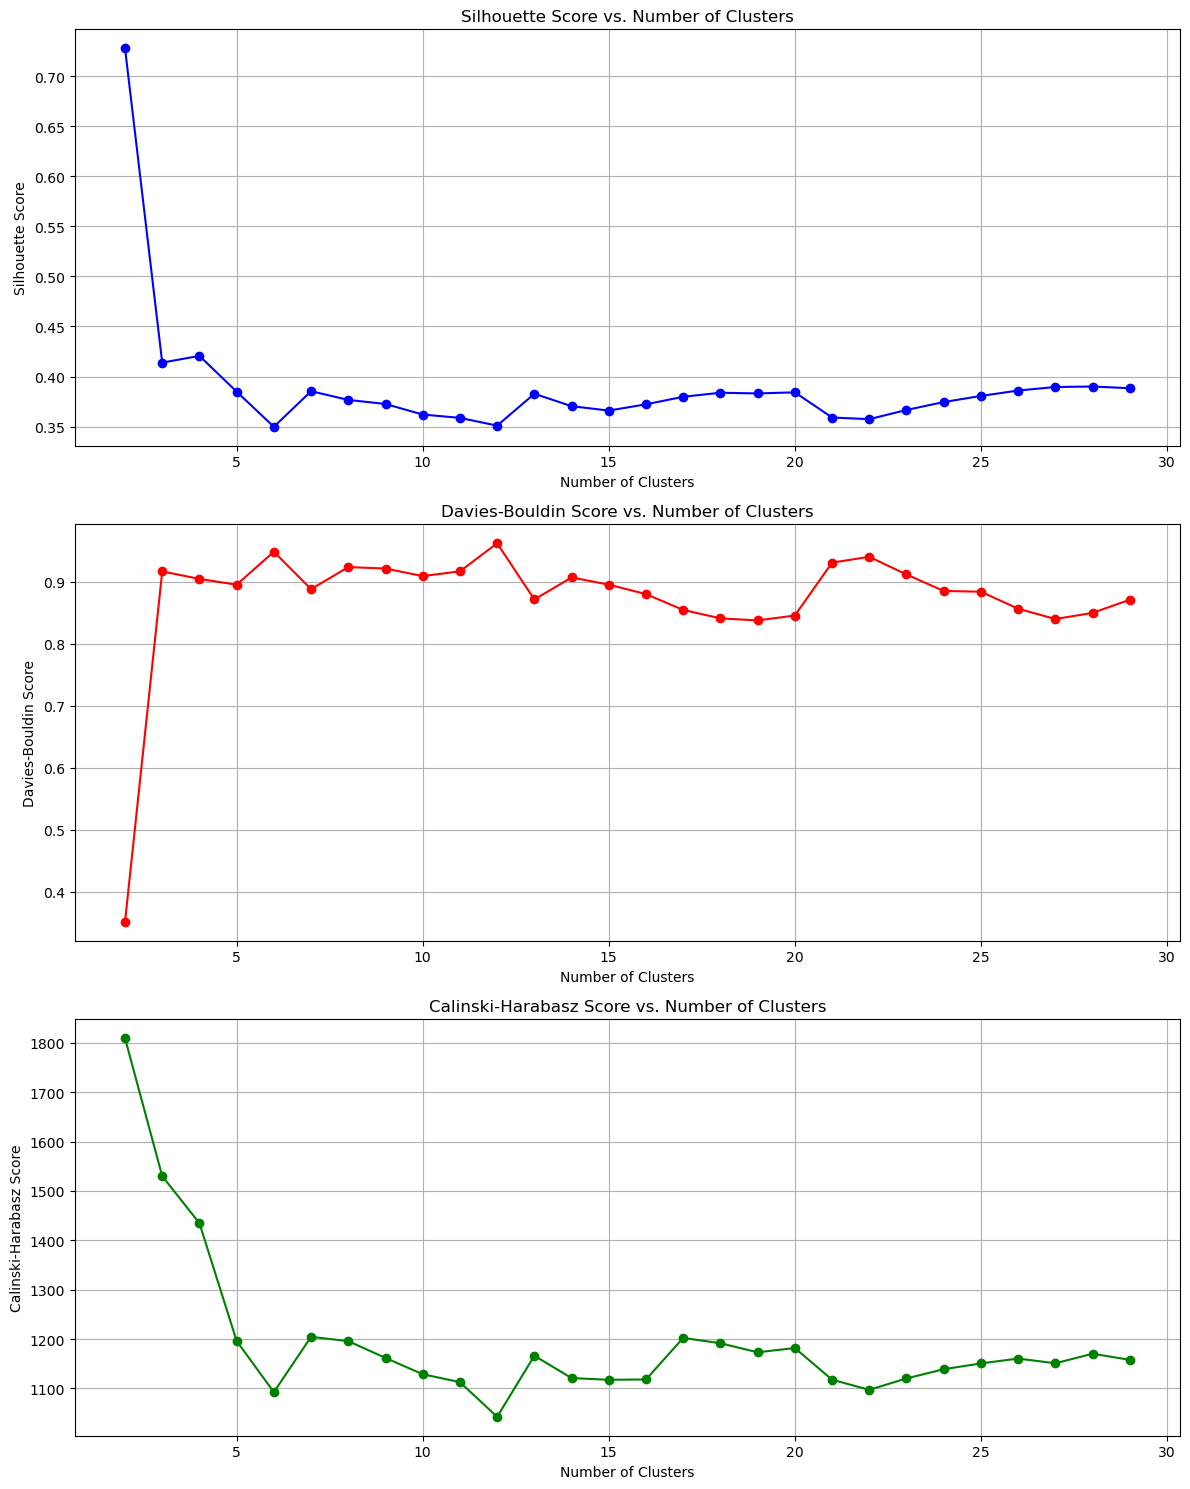

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Initialize lists to store evaluation scores
sil_scores = []
db_scores = []
ch_scores = []

# Define the range of clusters to search
search_range = range(2, 30)

# Iterate through different numbers of clusters
for k in search_range:
    k_means = KMeans(n_clusters=k, random_state=42).fit(umap_data)
    labels = k_means.labels_
    
    # Calculate scores
    sil_scores.append(silhouette_score(umap_data, labels))
    db_scores.append(davies_bouldin_score(umap_data, labels))
    ch_scores.append(calinski_harabasz_score(umap_data, labels))

# Find optimal clusters for each metric
max_sil_score = max(sil_scores)
optimal_clusters_sil = search_range[np.argmax(sil_scores)]

min_db_score = min(db_scores)
optimal_clusters_db = search_range[np.argmin(db_scores)]

max_ch_score = max(ch_scores)
optimal_clusters_ch = search_range[np.argmax(ch_scores)]

print(f"The highest silhouette score: {max_sil_score} (Optimal clusters: {optimal_clusters_sil})")
print(f"The lowest Davies-Bouldin score: {min_db_score} (Optimal clusters: {optimal_clusters_db})")
print(f"The highest Calinski-Harabasz score: {max_ch_score} (Optimal clusters: {optimal_clusters_ch})")

# Plot the scores
plt.figure(figsize=(12, 15))

# Subplot for Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(search_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot for Davies-Bouldin Score
plt.subplot(3, 1, 2)
plt.plot(search_range, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)


# Subplot for Calinski-Harabasz Score
plt.subplot(3, 1, 3)
plt.plot(search_range, ch_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
from sklearn.cluster import KMeans
import pandas as pd

optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_data)

target_series = pd.Series(cluster_labels)

plot_algo3d_interactive(umap_data, target_series, algo_name='UMAP', target_name='Clusters')


In [48]:
umap_data_pd = pd.DataFrame(umap_data, columns=[[f'T-SNE {i}' for i in range(1, 4)]])

umap_data_clusters_pd = pd.concat([umap_data_pd, target_series], axis=1)
umap_data_clusters_pd.columns = ['UMAP 1', 'UMAP 2', 'UMAP 3', 'CLUSTER']
umap_data_clusters_pd

,UMAP 1,UMAP 2,UMAP 3,CLUSTER
0,12.310392,10.702045,4.569131,0
1,12.946736,11.863702,4.290857,0
2,14.120613,8.972908,5.015719,0
3,5.381438,7.854438,9.311152,1
4,11.492323,8.710712,4.745177,0
...,...,...,...,...
601,10.085063,11.837458,6.674696,0
602,12.153135,10.906508,5.866053,0
603,13.256620,9.911009,4.579320,0
604,12.122365,9.241120,6.137006,0


In [50]:
summarise_umap_data = umap_data_clusters_pd.groupby(by=['CLUSTER']).describe()
summarise_umap_data.T

CLUSTER                0          1
UMAP 1 count  508.000000  98.000000
       mean    12.270504   6.608367
       std      1.000314   0.872230
       min     10.077472   5.043243
       25%     11.447949   5.658512
       50%     12.247241   7.004906
       75%     13.064694   7.308934
       max     14.319185   7.846721
UMAP 2 count  508.000000  98.000000
       mean     9.997566   7.932211
       std      1.114449   0.254850
       min      7.950386   7.432310
       25%      9.084764   7.778325
       50%      9.907296   7.899333
       75%     10.881854   8.053816
       max     12.192692   8.536977
UMAP 3 count  508.000000  98.000000
       mean     4.916825   9.508794
       std      0.796468   0.608118
       min      3.390227   8.283005
       25%      4.382693   9.310393
       50%      4.905763   9.429828
       75%      5.396943  10.058530
       max      6.832475  10.572487

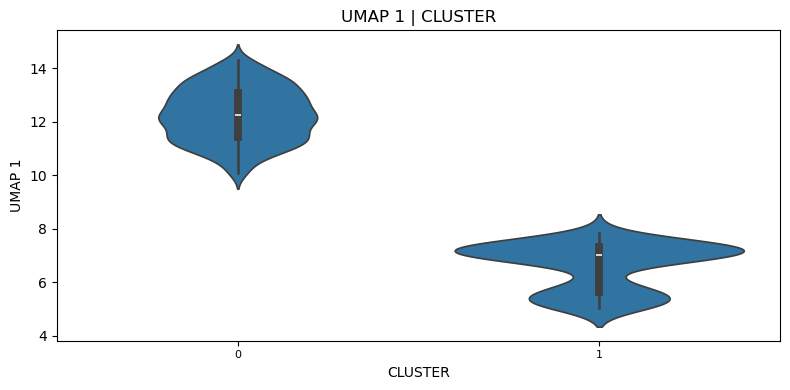

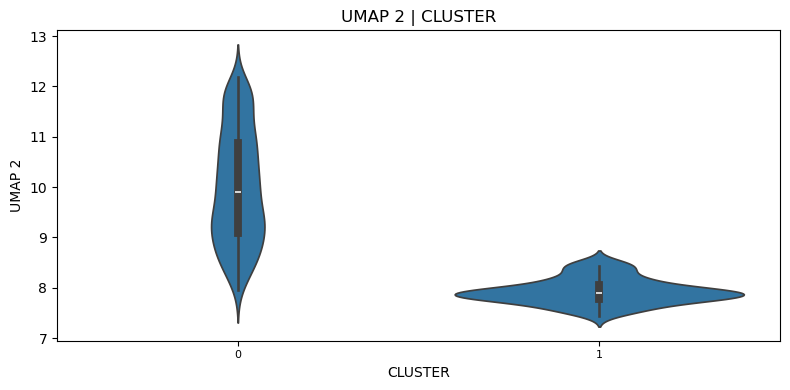

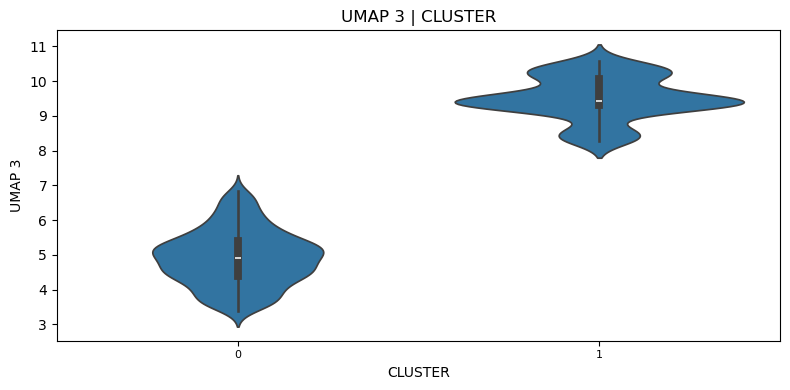

In [51]:
plot_violin_with_binary_hue(umap_data_clusters_pd, ['CLUSTER'], figure_size=(8,4))

In [35]:
pca3d = PCA(n_components=3)
pca3d.fit(log_data.iloc[:, 1:])
pca3d_data = pca3d.transform(log_data.iloc[:, 1:])

In [52]:
plot_algo3d_interactive(pca3d_data, target_series, algo_name='PCA 3D based on T-SNE clusters', target_name='Clusters')

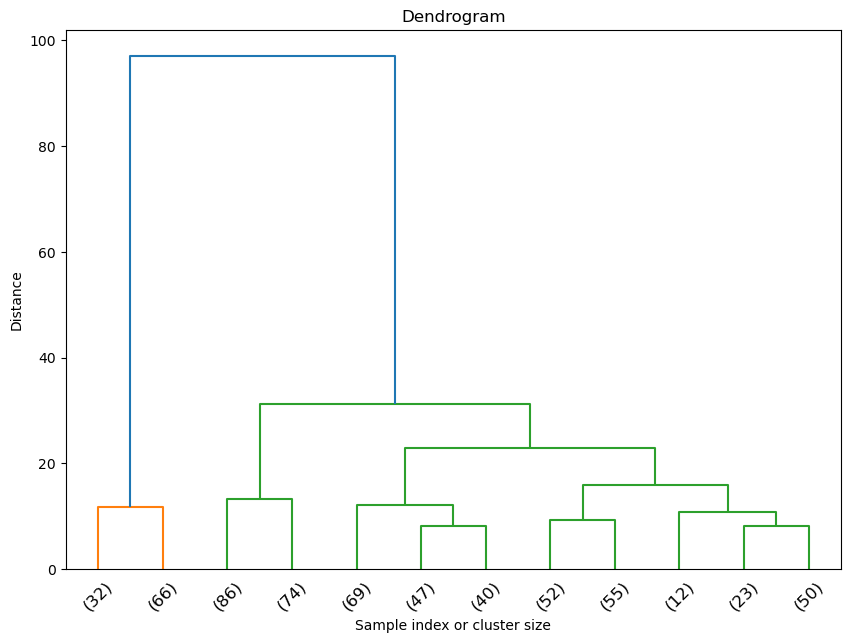

In [53]:
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglo_clusters = agglo.fit_predict(umap_data)

# Plot clusters
agglo_target = pd.Series(agglo_clusters)

plot_algo3d_interactive(umap_data, agglo_target, 'Agglomerative Clustering', 'Clusters')

# Generate and plot dendrogram (requires SciPy linkage)
linked = linkage(umap_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12.)
plt.title("Dendrogram")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.show()

The highest silhouette score: 0.7278775572776794 (Optimal clusters: 2)
The lowest Davies-Bouldin score: 0.3516997037104876 (Optimal clusters: 2)
The highest Calinski-Harabasz score: 1809.1900051262694 (Optimal clusters: 2)


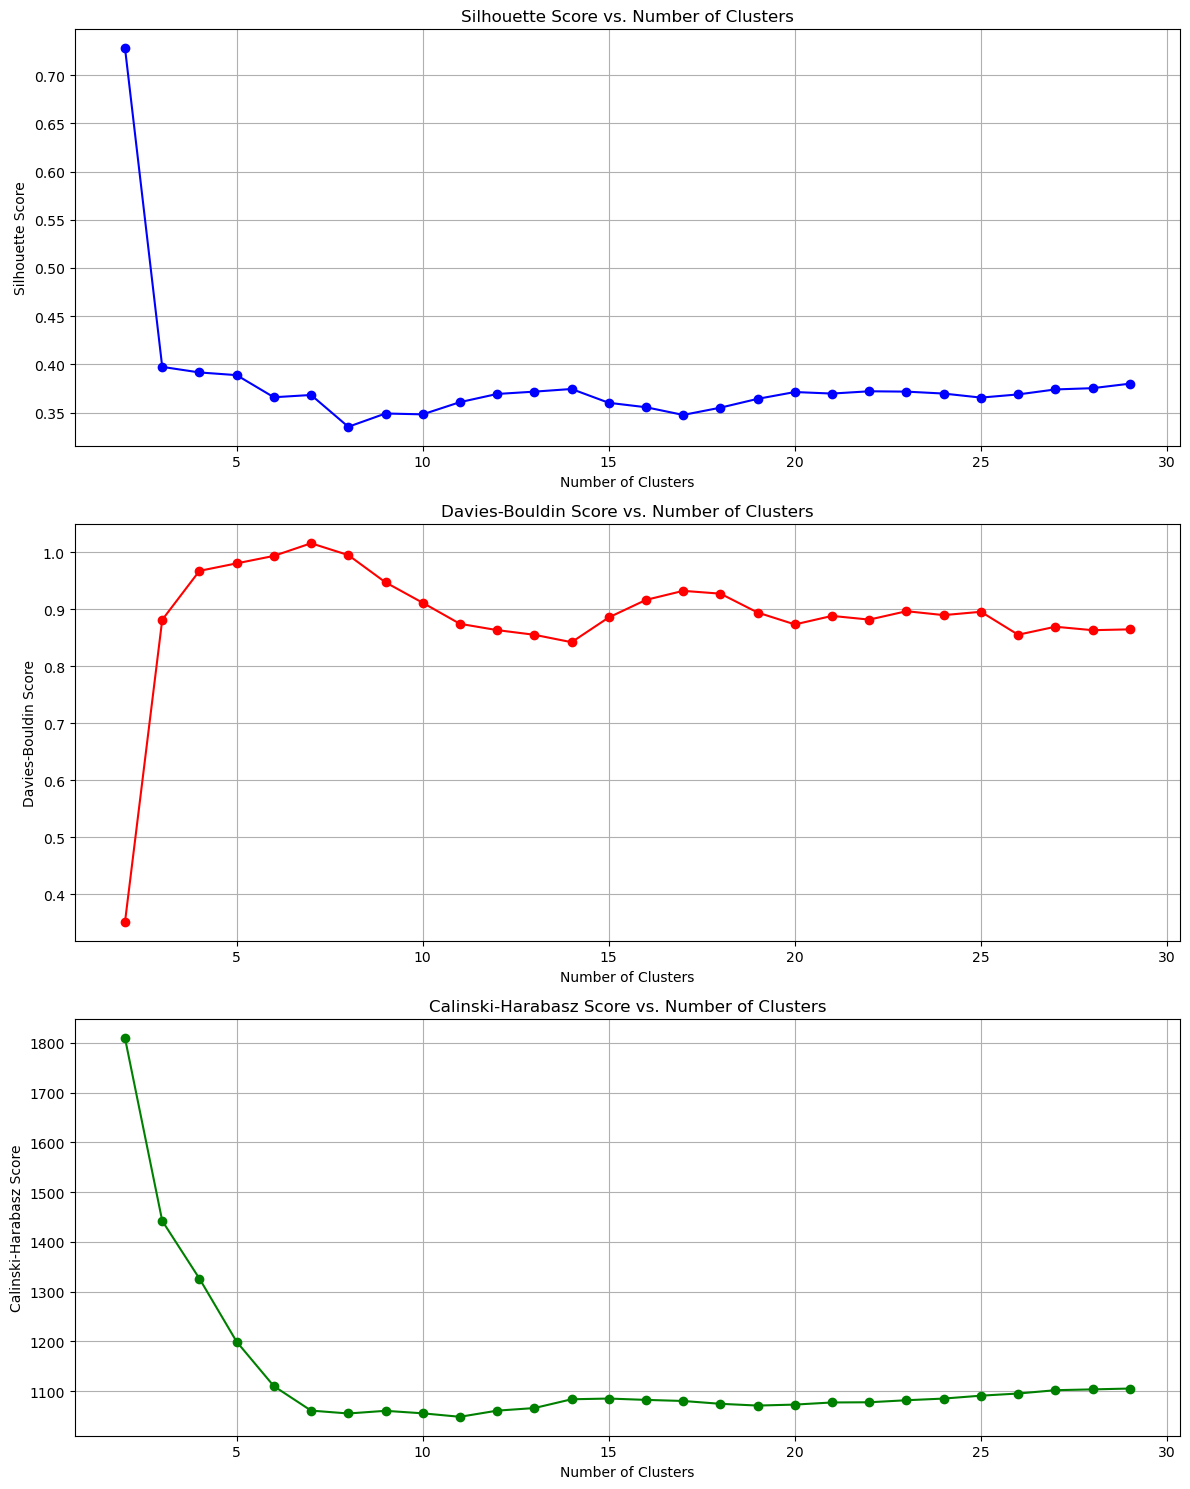

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Initialize lists to store evaluation scores
sil_scores = []
db_scores = []
ch_scores = []

# Define the range of clusters to search
search_range = range(2, 30)

# Iterate through different numbers of clusters
for k in search_range:
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agglo.fit_predict(umap_data)
    
    # Calculate scores
    sil_scores.append(silhouette_score(umap_data, labels))
    db_scores.append(davies_bouldin_score(umap_data, labels))
    ch_scores.append(calinski_harabasz_score(umap_data, labels))

# Find optimal clusters for each metric
max_sil_score = max(sil_scores)
optimal_clusters_sil = search_range[np.argmax(sil_scores)]

min_db_score = min(db_scores)
optimal_clusters_db = search_range[np.argmin(db_scores)]

max_ch_score = max(ch_scores)
optimal_clusters_ch = search_range[np.argmax(ch_scores)]

print(f"The highest silhouette score: {max_sil_score} (Optimal clusters: {optimal_clusters_sil})")
print(f"The lowest Davies-Bouldin score: {min_db_score} (Optimal clusters: {optimal_clusters_db})")
print(f"The highest Calinski-Harabasz score: {max_ch_score} (Optimal clusters: {optimal_clusters_ch})")

# Plot the scores
plt.figure(figsize=(12, 15))

# Subplot for Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(search_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot for Davies-Bouldin Score
plt.subplot(3, 1, 2)
plt.plot(search_range, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

# Subplot for Calinski-Harabasz Score
plt.subplot(3, 1, 3)
plt.plot(search_range, ch_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()


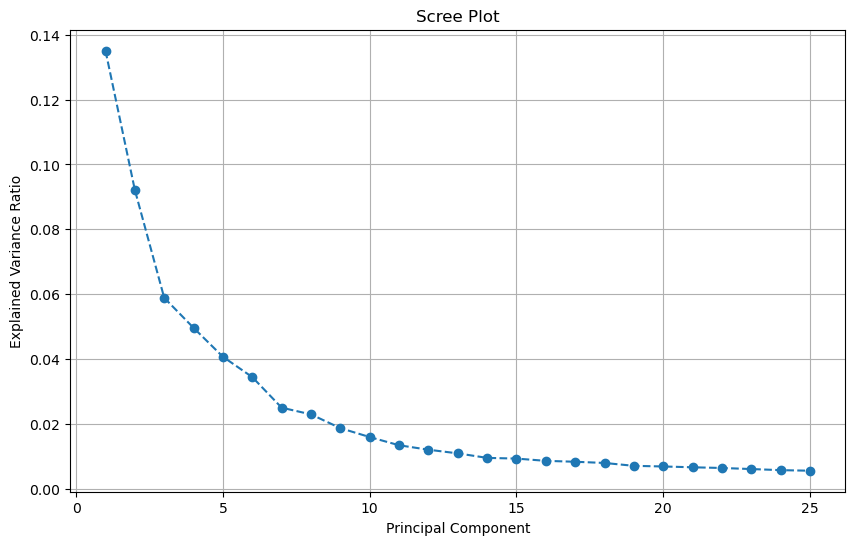

In [132]:
pca = PCA(n_components=25)  # Choose a range; for visualization, 50 components is reasonable
pca.fit(log_data.iloc[:, 1:])

# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

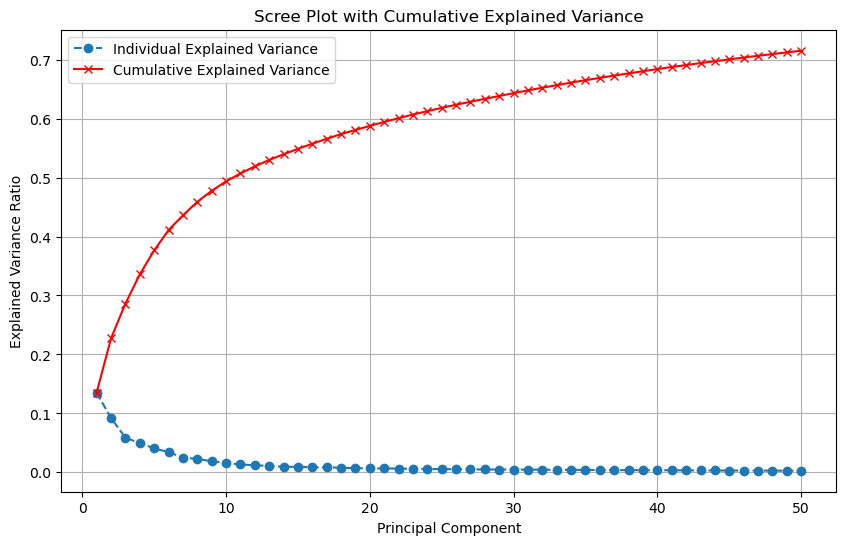

In [24]:
pca = PCA(n_components=50)
pca_data = pca.fit_transform(log_data[numeric_columns])

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), pca.explained_variance_ratio_, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, 51), cumulative_variance, marker='x', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot with Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

### **PCA** for $n = 20$ 

### **PCA** for $n = 60$

---
# ***TDA*** - *Kepler Mapper*
---

### ***T-SNE -> DBSCAN***

In [32]:
# Import the class
import kmapper as km
from sklearn.cluster import DBSCAN

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = DBSCAN(eps=20, min_samples=1)

# Create the graph
graph = mapper.map(tsne_data, pca_data, clusterer=clusterer, cover=km.Cover(n_cubes=10, perc_overlap=0.2))

# Visualize
mapper.visualize(graph, path_html=r"kmapper_visualisations\tsne_dbscan.html", title="tsne with dbscan")


KeplerMapper(verbose=10)
Mapping on data shaped (606, 4) using lens shaped (606, 3)

Minimal points in hypercube before clustering: 1
Creating 1000 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hyperc

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>tsne with dbscan | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-we

### ***UMAP -> KMeans***

In [59]:
# Import the class
import kmapper as km
from sklearn.cluster import KMeans

# pca = umap.UMAP(n_components=4)  # Adjust as needed
# pca_data = pca.fit_transform(log_data[numeric_columns])

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = KMeans(n_clusters=2)

# Create the graph
graph = mapper.map(umap_data, log_data[numeric_columns], clusterer=clusterer, cover=km.Cover(n_cubes=15, perc_overlap=0.25))

# Visualize
mapper.visualize(graph, path_html=r"kmapper_visualisations\umap_kmeans.html", title="umap with kmeans")

KeplerMapper(verbose=10)
Mapping on data shaped (606, 20530) using lens shaped (606, 3)

Minimal points in hypercube before clustering: 2
Creating 3375 hypercubes.
Cube_0 is empty.

   > Found 2 clusters in hypercube 1.
Cube_2 is empty.

   > Found 2 clusters in hypercube 3.
   > Found 2 clusters in hypercube 4.
   > Found 2 clusters in hypercube 5.
Cube_6 is empty.

Cube_7 is empty.

   > Found 2 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 2 clusters in hypercube 11.
   > Found 2 clusters in hypercube 12.
Cube_13 is empty.

Cube_14 is empty.

   > Found 2 clusters in hypercube 15.
   > Found 2 clusters in hypercube 16.
   > Found 2 clusters in hypercube 17.
   > Found 2 clusters in hypercube 18.
   > Found 2 clusters in hypercube 19.
   > Found 2 clusters in hypercube 20.
   > Found 2 clusters in hypercube 21.
   > Found 2 clusters in hypercube 22.
   > Found 2 clusters in hypercube 23.
   > Found 2 clusters in hyper

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>umap with kmeans | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-we

In [16]:
# Import the class
import kmapper as km
from sklearn.cluster import DBSCAN

pca = PCA(n_components=4)  # Adjust as needed
pca_data = pca.fit_transform(log_data[numeric_columns])

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = DBSCAN(eps=20, min_samples=1)

# Create the graph
graph = mapper.map(pca_data, log_data[numeric_columns], clusterer=clusterer, cover=km.Cover(n_cubes=5, perc_overlap=0.3))

# Visualize
mapper.visualize(graph, path_html="kmapper_visualisations\dbscan_keplermapper_output.html", title="log_data")

KeplerMapper(verbose=10)
Mapping on data shaped (606, 20530) using lens shaped (606, 4)

Minimal points in hypercube before clustering: 1
Creating 625 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 2 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 2 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 2 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hyp

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>log_data | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 70